# Homework 2 - Olivier Gilbert

## 1.

### a)
### $$\tau(\lambda) = \tau_0 e^{-\frac{(\lambda-\lambda_0)^2}{2\sigma^2}}$$

In [81]:
import numpy as np
import matplotlib.pyplot as plt
# Define gaussian spectral line
def tau_lambda(wavelenghts:np.ndarray, lambda_0:float, tau_0:float, sigma:float) -> np.ndarray:
    """Returns an array of tau as a function of wavelengths"""
    return (
        tau_0 * np.exp(-np.power((wavelenghts-lambda_0) / sigma, 2.0) / 2)
    )

### b)

In [16]:
def intensity(tau_lambda:np.ndarray, I_0:float, factor:float) -> np.ndarray:
    """Assume S is a multiplication of I_0. Assume I_0 is constant over the line width."""
    S = I_0*factor
    return I_0*np.exp(-tau_lambda)+S*(1-np.exp(-tau_lambda))

def intensity_v2(tau_lambda:np.ndarray, I_0:np.ndarray, S:np.ndarray) -> np.ndarray:
    """More general definition of I_0 and S."""
    return I_0*np.exp(-tau_lambda)+S

### c)

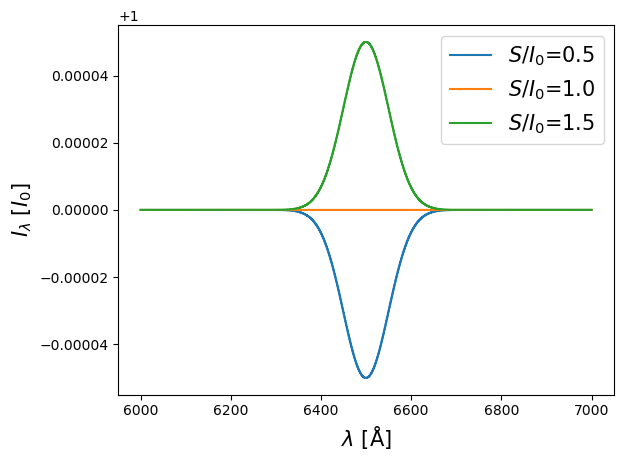

In [55]:
# Calculate spectrum
wavs = np.linspace(6000,7000,1000) # in Angstroms
lambda_0 = np.mean(wavs)
sigma = (np.max(wavs)-np.min(wavs))/20
x = (wavs-lambda_0)/sigma
S_factors = [0.5,1,1.5]
for S_factor in S_factors:
    I_lambda = intensity(tau_lambda=tau_lambda(wavs, lambda_0, 1E-4, sigma),
            I_0=1,
            factor=S_factor
            )
    plt.step(wavs, I_lambda, label=f"$S/I_0$={S_factor:.1f}")
plt.legend(fontsize=15)
plt.xlabel(r"$\lambda$ [$\mathrm{\AA}$]", fontsize=15)
plt.ylabel(r"$I_\lambda$ [$I_0$]", fontsize=15)
plt.show()

#### i) For an emission line to exist, the ratio $\frac{S}{I_0}$ needs to be greater than 1.
#### ii) For an absorption line to exist, the ratio $\frac{S}{I_0}$ needs to be lesser than 1.
#### iii) For no line to exist, the ratio $\frac{S}{I_0}$ needs to be equal to 1.

### d)

We can calculate the conditions needed for an emission line starting from the radiative transfer equation.
$$I(\lambda) = I_0 e^{-\tau_\lambda}+S(1-e^{-\tau_\lambda})$$

For an emission line, we need $I(\lambda_0)>I_0$:

$$I(\lambda_0) > I_0$$
$$I_0 e^{-\tau_0}+S(1-e^{-\tau_0}) > I_0$$
$$e^{-\tau_0}+\frac{S}{I_0}(1-e^{-\tau_0}) > 1$$
$$\frac{S}{I_0}(1-e^{-\tau_0})+e^{-\tau_0}-1 > 0$$
$$\left(\frac{S}{I_0}-1\right)(1-e^{-\tau_0})> 0$$

Since $0<\tau_0\ll 1$, we know the term $(1-e^{-\tau_0})$ is necessarily positive. This means we need $\frac{S}{I_0}-1>0$, so $\frac{S}{I_0}>1$, just like we concluded in c).

For an absorption line, we need $I(\lambda_0)<I_0$:

$$I(\lambda_0) < I_0$$
$$I_0 e^{-\tau_0}+S(1-e^{-\tau_0}) < I_0$$
$$e^{-\tau_0}+\frac{S}{I_0}(1-e^{-\tau_0}) < 1$$
$$\frac{S}{I_0}(1-e^{-\tau_0})+e^{-\tau_0}-1 < 0$$
$$\left(\frac{S}{I_0}-1\right)(1-e^{-\tau_0})< 0$$

Since $0<\tau_0\ll 1$, we know the term $(1-e^{-\tau_0})$ is necessarily positive. This means we need $\frac{S}{I_0}-1<0$, so $\frac{S}{I_0}<1$, just like we concluded in c).

For an absorption line, we need $I(\lambda_0)=I_0$:

$$I(\lambda_0) = I_0$$
$$I_0 e^{-\tau_0}+S(1-e^{-\tau_0}) = I_0$$
$$e^{-\tau_0}+\frac{S}{I_0}(1-e^{-\tau_0}) = 1$$
$$\frac{S}{I_0}(1-e^{-\tau_0})+e^{-\tau_0}-1 = 0$$
$$\left(\frac{S}{I_0}-1\right)(1-e^{-\tau_0})= 0$$

Since $0<\tau_0\ll 1$, we know the term $(1-e^{-\tau_0})$ is necessarily positive. This means we need $\frac{S}{I_0}-1=0$, so $\frac{S}{I_0}=1$, just like we concluded in c).

### e)

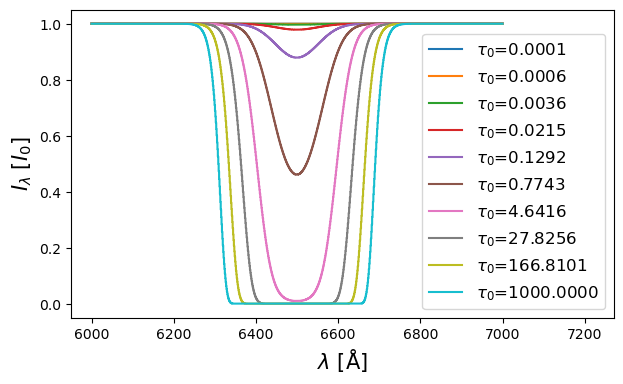

In [ ]:
tau_0s = np.logspace(-4,3,10)
plt.figure(figsize=(7,4))
for tau0 in tau_0s:
    taus = tau_lambda(wavs, lambda_0, tau0, sigma)
    I_lambda = intensity(tau_lambda=taus,I_0=1,factor=0)
    plt.step(wavs, I_lambda, label=r"$\tau_0$="+f"{tau0:.4f}")
plt.legend(fontsize=12)
xlims = plt.xlim()
plt.xlim(left=xlims[0], right=xlims[1]+(xlims[1]-xlims[0])*0.2)
plt.xlabel(r"$\lambda$ [$\mathrm{\AA}$]", fontsize=15)
plt.ylabel(r"$I_\lambda$ [$I_0$]", fontsize=15)
plt.show()

The line becomes larger and changes the intensity more as $\tau_0$ becomes larger. It seems to saturate at $\tau_0\sim5$.

### f)

We want to measure the "strength" = $\int I_0 \mathrm{d}\lambda - \int I\mathrm{d}\lambda$. We can rewrite this as  $\int (I_0-I) \mathrm{d}\lambda$, which can be numerically integrated quite easily if we define this new function to integrate:

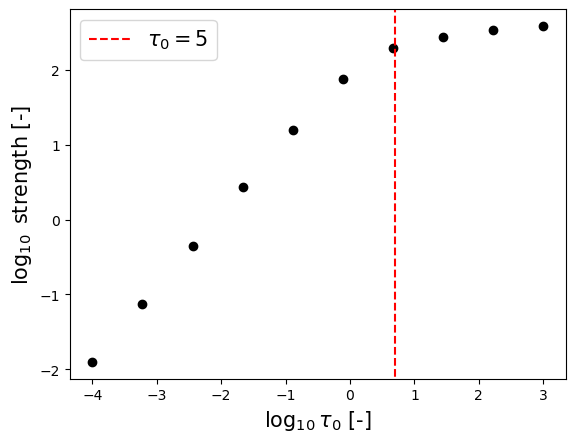

In [80]:
from scipy.integrate import quad
strengths = []
for tau0 in tau_0s:
    function_to_integrate = lambda wav: 1-intensity(tau_lambda=tau_lambda(wav, lambda_0, tau0, sigma),I_0=1,factor=0) # In units of I_0
    strength = quad(function_to_integrate, 0, 30000)
    strengths.append(strength[0])
plt.plot(np.log10(tau_0s), np.log10(strengths), marker="o", ls="None", color="black")
plt.xlabel(r"$\log_{10} \tau_0$ [-]", fontsize=15)
plt.ylabel(r"$\log_{10}$ strength [-]", fontsize=15)
plt.axvline(np.log10(5), -2,4, ls="--", marker="None", color="red", label=r"$\tau_0=5$")
plt.legend(fontsize=15)
plt.show()


We see in this curve of growth plot that the strength of the line grows larger with $\tau_0$ until it saturates at $\tau_0\sim5$. At this point, the strength starts to plateau.

## 2.

The informations we have are:

$$\frac{F_c-F_\nu}{F_c} \approx \frac{S_\nu(\tau_c)-S_\nu(\tau_nu)}{S_\nu(\tau_c)} \quad \quad \quad (1)$$

$$\mathrm{d}\tau_\nu = (l_\nu+\kappa_\nu)\rho \mathrm{d}x = \mathrm{d}\tau_l+\mathrm{d}\tau_c \quad \quad (2)$$

$$\tau_l \ll \tau_c \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \, (3)$$

We want to expand the second term on the right-hand side numerator of the first equation to obtain:

$$\frac{F_c-F_\nu}{F_c} \approx \frac{l_\nu}{\kappa_\nu} \times \text{invariant factors}$$

We start with integrating (2):

\begin{align*}
\mathrm{d}\tau_\nu & = \mathrm{d}\tau_l+\mathrm{d}\tau_c \\
\tau_\nu & = \tau_l+\tau_c \\
\end{align*}

We can combine this with (2) to find that

$$\tau_l \approx \frac{l_\nu}{\kappa_\nu}\tau_c$$

We can then use the Eddington approximation to write $S_\nu$ as a function of $\tau_\nu$:

$$S_\nu(\tau_\nu) = \frac{3}{4\pi}F_\nu(0)\left(\tau_\nu + \frac{2}{3}\right)$$

We can then expand this expression (which corresponds to the right-hand side term in (1)) in a Taylor series centered on $\tau_c$.

\begin{align*}
S_\nu(\tau_\nu) = \sum_{n=0}^\infty \frac{S_\nu^{(n)}(\tau_c)}{n!}(\tau_\nu-\tau_c)^n \\
\end{align*}

If we calculate $\frac{\mathrm{d}S_\nu(\tau_c)}{\mathrm{d}\tau_\nu}$, we see that it is constant. Therefore, all powers of $n>1$ will be 0, and we can remove those terms from the sum.

$$\frac{\mathrm{d}S_\nu(\tau_c)}{\mathrm{d}\tau_\nu} = \frac{3}{4\pi}F_\nu(0)$$

We then have

\begin{align*}
S_\nu(\tau_\nu) = S_\nu(\tau_c) + \frac{3}{4\pi}F_\nu(0)(\tau_\nu-\tau_c) \\
\end{align*}

We can insert this result in the equation (1) to start the proof:


\begin{align*}
\frac{F_c-F_\nu}{F_c} & \approx \frac{S_\nu(\tau_c)-S_\nu(\tau_\nu)}{S_\nu(\tau_c)} \\
 & \approx \frac{S_\nu(\tau_c)-\left(S_\nu(\tau_c) + \frac{3}{4\pi}F_\nu(0)(\tau_\nu-\tau_c)\right)}{S_\nu(\tau_c)} \\
 & \approx \frac{S_\nu(\tau_c)}{S_\nu(\tau_c)} - \left(\frac{S_\nu(\tau_c)}{S_\nu(\tau_c)} + \frac{\frac{3}{4\pi}F_\nu(0)(\tau_\nu-\tau_c)}{S_\nu(\tau_c)}\right)\\
 & \approx 1 - \left(1 + \frac{\frac{3}{4\pi}F_\nu(0)(\tau_\nu-\tau_c)}{\frac{3}{4\pi}F_\nu(0)(\tau_c+\frac{2}{3})}\right)\\
 & \approx -\frac{(\tau_\nu-\tau_c)}{(\tau_c+\frac{2}{3})}\\
 & \approx -\frac{\tau_l}{(\tau_c+\frac{2}{3})}\\
 & \approx -\frac{\frac{l_\nu}{\kappa_\nu}\tau_c}{(\tau_c+\frac{2}{3})}\\
 & \approx \frac{l_\nu}{\kappa_\nu}\times\frac{-\tau_c}{(\tau_c+\frac{2}{3})}\\
 & \approx \frac{l_\nu}{\kappa_\nu}\times\text{invariant factors}\\
\end{align*}
$$\square$$

## 3.

If we consider a gas following a Maxwell-Boltzmann distribution such that
$$v_\mathrm{ave} = \sqrt{\frac{8kT}{\pi m}}$$
How will the spectral lines of iron respond to pressure broadening from various pertubers:

### a)

For quadratic Stark broadening, the damping coefficient scales as $\gamma_4 \propto v^{1/3}N$. We can write that expression and separate the terms related to each possible charged perturber (electrons and ions):

\begin{align*}
\gamma_4 & \propto v^{1/3}N\\
\gamma_4 & \propto \left[\frac{8kT}{\pi m}\right]^{1/6}N\\
\gamma_4 & \propto \left[\frac{8kT}{\pi }\left(\frac{1}{m_A}+\frac{1}{m_e}\right)\right]^{1/6}N_\mathrm{e}+\left[\frac{8kT}{\pi }\left(\frac{1}{m_A}+\frac{1}{m_\mathrm{ion}}\right)\right]^{1/6}N_\mathrm{ion}\\
\end{align*}

Where $m_A$ is the mass of the iron atoms. Since $m_A\gg m_e$, $m_\mathrm{ion} \gg m_e$, and $N_e$ should be approximately of the same order as $N_\mathrm{ion}$, we can approximate $\gamma_4$ to

\begin{align*}
\gamma_4 & \underset{\sim}{\propto} \left[\frac{8kT}{\pi }\left(\frac{1}{m_e}\right)\right]^{1/6}N_\mathrm{e}\\
\end{align*}

We can then conclude that electrons will be the primary perturbers for the Stark broadening.


### b)

For van der Waals broadening, the damping coefficient scales as $\gamma_6 \propto v^{3/5}N$. The possible neutral perturbers are neutrons and neutral atoms. We can once again separate the terms.

\begin{align*}
\gamma_6 & \propto v^{3/5}N \\
\gamma_6 & \propto \left[\frac{8kT}{\pi m}\right]^{3/10}N \\
\gamma_6 & \propto \left[\frac{8kT}{\pi}\left(\frac{1}{m_A}+\frac{1}{m_n}\right)\right]^{3/10}N_n + \left[\frac{8kT}{\pi}\left(\frac{1}{m_A}+\frac{1}{m_H}\right)\right]^{3/10}N_H + \left[\frac{8kT}{\pi}\left(\frac{1}{m_A}+\frac{1}{m_k}\right)\right]^{3/10}N_k \\
\end{align*}

Where $m_A$ is the mass of the iron atoms, $m_H$ is the mass of an hydrogen atom, $m_n$ is the mass of a neutron ($m_n\approx m_H$), and $m_k$ is the mass of any other neutral atom in the gas. Since there is a lot more hydrogen in the universe than other atoms, we approximate $N_H\gg N_k$. We also know that $m_H \ll m_A$ because hydrogen atoms are much lighter than iron. Finally, we replace $m_n$ by $m_H$ since they are so similar, which enables us to simplify this equation to:


\begin{align*}
\gamma_6 & \underset{\sim}{\propto} \left[\frac{8kT}{\pi}\left(\frac{1}{m_H}\right)\right]^{3/10}N_n + \left[\frac{8kT}{\pi}\left(\frac{1}{m_H}\right)\right]^{3/10}N_H \\
\gamma_6 & \underset{\sim}{\propto} \left[\frac{8kT}{\pi}\left(\frac{1}{m_H}\right)\right]^{3/10}\left(N_n+N_H\right) \\
\end{align*}

We can then conclude that the dominant perturbers for neutral particles should be neutrons and neutral hydrogens. In the case where the number density of hydrogen is much higher than the number density of neutrons, we could simply remove $N_n$ from the equation above and conclude that the dominant perturbers are hydrogen atoms.

### c)

If we consider another element than iron, the answer to part **a)** wouldn't change, because the statement $m_e\ll m_A$ is true for any atom, even hydrogen. We could therefore keep all the same assumptions. On the other hand, **b)** would slightly change, because even if the dominant perturbers wouldn't change, the mass of the atom could be comparable to the mass of the perturbers (neutrons and hydrogens) if the atom is light enough. This would make us remove the $m_H \ll m_A$ assumption, which would result in the following:

$$\gamma_6 \underset{\sim}{\propto} \left[\frac{8kT}{\pi}\left(\frac{1}{m_A}+\frac{1}{m_H}\right)\right]^{3/10}\left(N_n+N_H\right)$$